Connected to torch_env (Python 3.10.18)

In [ ]:
# >>> imports
import os, re, glob
from numpy import record
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import pydicom.dataset
from data_loader import CQ500Dataset

In [ ]:
# >>> loading and reading the CSV files
reads = pd.read_csv("csv-files/reads.csv")
compact_reads = pd.read_csv("csv-files/compact_reads.csv")
# reads.head()
compact_reads.head()

# Value check of reads.csv file,
# Brief is below this code
#for col in reads.columns:
#	print("Values per column: ", reads[col].value_counts())

#* to extract info from the dataset:
# b1_count = 0
# b2_count = 0
# for i, r in reads.iterrows():
# 	# print(f"Patient {r['name']}/{r['Category']} = R1: {r['R1:ICH']}/R2: {r['R2:ICH']}/R3: {r['R3:ICH']}")
# 	if r['R1:ICH'] == 1 or r['R2:ICH'] == 1 or r['R3:ICH'] == 1:
# 		if r['Category'] == 'B1':
# 			b1_count += 1
# 		if r['Category'] == 'B2':
# 			b2_count += 1
# print(f"B1 ICH: {b1_count}\nB2 ICH: {b2_count}")

#* the data shows:
# > dtypes are int64
# > R1-2-3: ICH, IPH, IVH, SDH, EDH, SAH
# > ~: BleedLocation-Left / -Right
# > ~: ChronicBleed, Fracture, CalvarialFracture, OtherFracture
# > ~: MassEffect, MisslineShift
# > ~: No missing values
# > the R1-3 are readers and each reader has 14 features
# "name" is the unique id to check patients
# 491 patients
# B1 is real-world appearance of ICH in a 30 days period	=~ 214 (050 - 23%)
# B2 is enriched in ICH (double checked)					=~ 277 (196 - 70%)
# Agreement of the radiologist differ on the scans:
# Only 1 Rad agrees = 41 scans -> we can check with a radiologist
# Only 2 Rads agree = 37 scans
# All  3 Rads agree = 168 scans

,name,ICH-sum,ICH-majority,ICH-soft
0,CQ500-CT-427,3,1,1.0
1,CQ500-CT-181,3,1,1.0
2,CQ500-CT-99,0,0,0.0
3,CQ500-CT-47,0,0,0.0
4,CQ500-CT-195,0,0,0.0


In [ ]:
# >>> checking parquet file
pq = pd.read_parquet("cq500ct_qct19_manifest.parquet")
pq['name'] = pq['name'].astype(str)
pq.head()

,name,series_uid,instance_num,path,slice_thick_mm,series_desc
0,CQ500-CT-9,1.2.276.0.7230010.3.1.3.296485376.1.1521713734...,1,data\qct19\CQ500CT9 CQ500CT9\Unknown Study\CT ...,0.625,Thin Plain
1,CQ500-CT-9,1.2.276.0.7230010.3.1.3.296485376.1.1521713734...,2,data\qct19\CQ500CT9 CQ500CT9\Unknown Study\CT ...,0.625,Thin Plain
2,CQ500-CT-9,1.2.276.0.7230010.3.1.3.296485376.1.1521713734...,3,data\qct19\CQ500CT9 CQ500CT9\Unknown Study\CT ...,0.625,Thin Plain
3,CQ500-CT-9,1.2.276.0.7230010.3.1.3.296485376.1.1521713734...,4,data\qct19\CQ500CT9 CQ500CT9\Unknown Study\CT ...,0.625,Thin Plain
4,CQ500-CT-9,1.2.276.0.7230010.3.1.3.296485376.1.1521713734...,5,data\qct19\CQ500CT9 CQ500CT9\Unknown Study\CT ...,0.625,Thin Plain


In [ ]:
# >>> checking one patient / one study / one series / one dicom
ds = CQ500Dataset(manifest_df=pq, labels_df=compact_reads, transform=None)
# print(f"Studies available: {len(ds)}")	# available studies

# one study: shape and label
x, y = ds[2] # get idx 0
print("tensor shape: ", x.shape)
print("label - ICH: ", y.item())

tensor shape:  torch.Size([30, 3, 256, 256])
label - ICH:  1.0


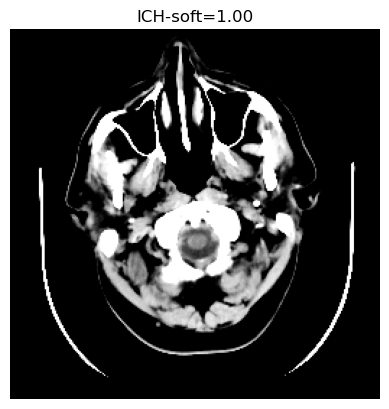

In [ ]:
# >>> visual check the study
plt.imshow(x[0,0].cpu(), cmap='gray')
plt.title(f"ICH-soft={y:.2f}")
plt.axis('off')
plt.show()